In [39]:
import numpy
import os
import pandas

from matplotlib import pyplot
from scipy.signal import windows

PATH = "../results"
model_name = "test.20210706T061320.283760.backup"

def sliding_window(x, kernel_size):
    """
    Computes a sliding window average over the specified data
    
    :param x: A `numpy.ndarray` of the data
    :param kernel_size: An `int` of the size of the sliding window
    
    :returns : A `numpy.ndarray` of the averaged data
    """
    if kernel_size < 2:
        return x
    window = windows.boxcar(kernel_size)
    window = window / window.sum()
    _x = numpy.pad(x, (kernel_size, kernel_size), mode="edge")
    return numpy.convolve(_x, window, mode="same")[kernel_size : -kernel_size]

def plot_score(df, x, y, shade_keys=None, smooth=1):
    """
    Plots the scores from a `pandas.DataFrame` using the provided 
    key
    
    :param df: A `pandas.DataFrame`
    :param key: A `str` of the desired key
    :param shade_keys: A `list` of keys to use as shade
    :param xlabel:
    
    :returns : A `matplotlib.Figure` of the created plot
               A `matplotlib.Axes` of the create plot
    """
    fig, ax = pyplot.subplots(figsize=(3,3))
    ax.plot(df[x], sliding_window(df[y], smooth))
    if isinstance(shade_keys, (tuple, list)):
        ax.fill_between(
            df[x], 
            sliding_window(df[y] - df[shade_keys[0]], smooth), 
            sliding_window(df[y] + df[shade_keys[1]], smooth), 
            alpha=0.3
        )
    elif isinstance(shade_keys, str):
        ax.fill_between(
            df[x], 
            sliding_window(df[y] - df[shade_keys], smooth), 
            sliding_window(df[y] + df[shade_keys], smooth), 
            alpha=0.3
        )
    ax.set(
        xlabel=x, ylabel=y
    )
    return fig, ax

,steps,episodes,elapsed,mean,median,stdev,max,min,average_value,average_entropy,average_value_loss,average_policy_loss,n_updates,explained_variance
0,102,34,59.942301,0.302798,0.326503,0.197194,0.551056,0.080339,0.029325,1.418916,0.049912,-0.032544,63,0.001729
1,201,67,120.884009,0.378828,0.325862,0.328231,0.902390,0.082122,0.157948,1.418359,0.056648,-0.035581,126,-0.066474
2,300,100,182.167907,0.596714,0.516554,0.284529,1.026153,0.285856,0.302025,1.417778,0.066689,-0.040215,189,-0.031366
3,402,134,245.278809,0.531847,0.574446,0.235190,0.729646,0.135773,0.449492,1.416878,0.167583,-0.044383,252,-0.007342
4,501,167,306.687725,0.514909,0.338409,0.361135,1.006250,0.135059,0.554343,1.415987,0.199056,-0.049422,315,-0.000793


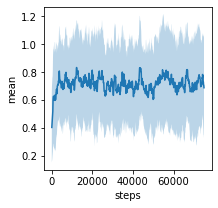

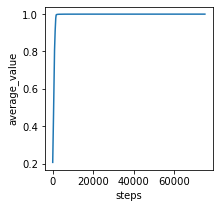

In [46]:
os.makedirs("./panels", exist_ok=True)

df = pandas.read_csv(os.path.join(PATH, model_name, "scores.txt"), sep="\t")
display(df.head())

smoothing_factor = 11
fig, ax = plot_score(df, "steps", "mean", shade_keys="stdev", smooth=smoothing_factor)
fig.savefig("./panels/mean_reward.pdf", transparent=True, bbox_inches="tight")
fig, ax = plot_score(df, "steps", "average_value", smooth=smoothing_factor)
pyplot.show()